<a href="https://colab.research.google.com/github/Kavya2099/NSW-Government-Data-Analytics-Virtual-Program/blob/main/NSW_Government_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NSW Data Analysis Case Study

The NSW Public Service Commission collects data about the public sector workforce in the Workforce Profile, a census of the NSW public sector workforce.



We need to provide analysis of this data in different areas such as employment arrangements, age profile and diversity profile of the workforce to support policy development.

#Task 1

 We need to provide analysis on:

1.   Trends over time in male and female employment, including any notable changes
2.   The current representation of part time employees in the sector and in each Cluster
3. The current representation of male and female part time employees as a proportion of the respective male and the female workforce in the sector and in each cluster
4. Change in these two above statistics over the last 4 years
5. Projection of what the representation will be by 2025 if the current trends continue







### Glossary

**Sector or Public Sector :** The term for the collective Agencies/people who directly work for the NSW State Government

**Cluster :** A group of agencies that share a common function and report to a secretary

**Headcount :** The number of employees

**pp:** Percentage Point

Getting data from excel

In [1]:
import pandas as pd
import numpy as np


Reading the sheet **PT & FT Data PivotTable format** from excel

In [2]:
df= pd.read_excel('./Data Analysis - Data Sheets.xlsx',sheet_name="PT & FT Data PivotTable format")

In [3]:
df.head(10)

,Cluster,Agency,Year,PT/FT,Gender,Headcount
0,Education,Education Agency 1,2014,Full-Time,Female,180
1,Education,Education Agency 2,2014,Full-Time,Female,2463
2,Education,Education Agency 3,2014,Full-Time,Female,32
3,Education,Education Agency 4,2014,Full-Time,Female,39251
4,Family & Community Services,Family & Community Services Agency 1,2014,Full-Time,Female,9817
5,Family & Community Services,Family & Community Services Agency 2,2014,Full-Time,Female,44
6,Family & Community Services,Family & Community Services Agency 3,2014,Full-Time,Female,82
7,"Finance, Services & Innovation","Finance, Services & Innovation Agency 1",2014,Full-Time,Female,3205
8,"Finance, Services & Innovation","Finance, Services & Innovation Agency 2",2014,Full-Time,Female,308
9,Health,Health Agency 1,2014,Full-Time,Female,76


In [4]:
df.describe()

,Year,Headcount
count,1840.000000,1840.000000
mean,2016.000000,1028.171739
std,1.414598,3003.876102
min,2014.000000,5.000000
25%,2015.000000,20.000000
50%,2016.000000,113.500000
75%,2017.000000,746.250000
max,2018.000000,41521.000000


Updating the feature names to lowercase

In [5]:
df.columns= df.columns.str.lower()
df.head()

,cluster,agency,year,pt/ft,gender,headcount
0,Education,Education Agency 1,2014,Full-Time,Female,180
1,Education,Education Agency 2,2014,Full-Time,Female,2463
2,Education,Education Agency 3,2014,Full-Time,Female,32
3,Education,Education Agency 4,2014,Full-Time,Female,39251
4,Family & Community Services,Family & Community Services Agency 1,2014,Full-Time,Female,9817


Updating all the values in the df to lowercase

In [6]:
columns=['cluster','agency','pt/ft','gender']

for col in columns:
  df[col]= df[col].str.lower()

df.head()

,cluster,agency,year,pt/ft,gender,headcount
0,education,education agency 1,2014,full-time,female,180
1,education,education agency 2,2014,full-time,female,2463
2,education,education agency 3,2014,full-time,female,32
3,education,education agency 4,2014,full-time,female,39251
4,family & community services,family & community services agency 1,2014,full-time,female,9817


Check for missing values

In [7]:
df.isnull().sum()

cluster      0
agency       0
year         0
pt/ft        0
gender       0
headcount    0
dtype: int64

Grouping values in each column

In [8]:

columns=['cluster','agency','year','pt/ft','gender']
for i in columns:
  print(i)
  print(df[i].value_counts())
  print('\n')


cluster
health                            660
justice                           280
premier & cabinet                 220
industry                          160
planning & environment            160
transport                         120
education                          80
family & community services        60
treasury                           60
finance, services & innovation     40
Name: cluster, dtype: int64


agency
education agency 1                 20
justice agency 4                   20
planning & environment agency 4    20
planning & environment agency 3    20
planning & environment agency 2    20
                                   ..
health agency 27                   20
health agency 26                   20
health agency 25                   20
health agency 24                   20
treasury agency 3                  20
Name: agency, Length: 92, dtype: int64


year
2014    368
2015    368
2016    368
2017    368
2018    368
Name: year, dtype: int64


pt/ft
full-time    920
p

# Trends over time in male and female employment, including any notable changes


Let's look at the changes over time 

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftmale= df[(df.gender=='male') & (df['pt/ft']=='full-time')]
ftfemale= df[(df.gender=='female') & (df['pt/ft']=='full-time')]
ptmale= df[(df.gender=='male') & (df['pt/ft']=='part-time')]
ptfemale= df[(df.gender=='female') & (df['pt/ft']=='part-time')]


- **ftmale** - records of male who is working full time
- **ftfemale** - records of female who is working full time
- **ptmale** - records of male who is working part time
- **ptfemale** - records of female who is working part time

We'll group by headcount to look over the changes 

In [131]:
time_ftmale= ftmale.groupby('year').headcount.sum()

In [132]:
time_ftmale

year
2014    123614
2015    118504
2016    117976
2017    114962
2018    111377
Name: headcount, dtype: int64

In [133]:
time_ftfemale= ftfemale.groupby('year').headcount.sum()
time_ftfemale

year
2014    156793
2015    152038
2016    154489
2017    155408
2018    155833
Name: headcount, dtype: int64

In [134]:
time_ptmale= ptmale.groupby('year').headcount.sum()
time_ptmale

year
2014    13995
2015    14302
2016    14678
2017    18706
2018    22034
Name: headcount, dtype: int64

In [135]:
time_ptfemale= ptfemale.groupby('year').headcount.sum()
time_ptfemale

year
2014    87983
2015    89943
2016    88264
2017    90721
2018    90216
Name: headcount, dtype: int64

In [136]:
#creating a dataframe combining time_ftmale and time_ftfemale 

time_ft = pd.concat([time_ftmale, time_ftfemale], axis=1)
time_ft


,headcount,headcount
year,,
2014,123614,156793
2015,118504,152038
2016,117976,154489
2017,114962,155408
2018,111377,155833


In [137]:
#Changing the column name
time_ft.columns=['male','female']


In [138]:
time_ft

,male,female
year,,
2014,123614,156793
2015,118504,152038
2016,117976,154489
2017,114962,155408
2018,111377,155833


In [139]:
#creating a dataframe combining time_ptmale and time_ptfemale 

time_pt = pd.concat([time_ptmale, time_ptfemale], axis=1)
time_pt

,headcount,headcount
year,,
2014,13995,87983
2015,14302,89943
2016,14678,88264
2017,18706,90721
2018,22034,90216


In [140]:
#Changing the column name
time_pt.columns=['male','female']
time_pt

,male,female
year,,
2014,13995,87983
2015,14302,89943
2016,14678,88264
2017,18706,90721
2018,22034,90216


Now Plotting the male and female trends separately using lineplot

#**Full Time Job Trend**

# Male Employee Trend in Full Time Jobs



Text(0.5, 1.0, 'Male Employee Trend in Full Time Jobs')

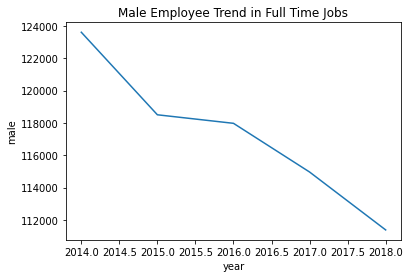

In [127]:

sns.lineplot(x= time_ft.index, y= time_ft.male, data=time_ft)
plt.title('Male Employee Trend in Full Time Jobs')


- There was a drop in full time job of male employees between 2014-2015
- There is not much change between 2015-2016
- There was a significant drop in 2016-2018. Around 3585 has either lost their jobs/ resigne their job


# Female Employee Trend in Full Time Jobs


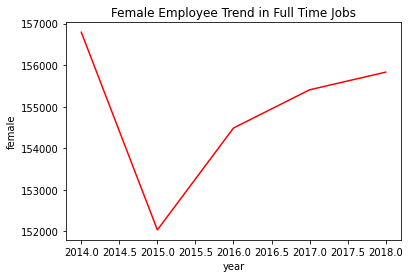

In [128]:
plt.title('Female Employee Trend in Full Time Jobs')
sns.lineplot(x= time_ft.index, y= time_ft.female, data=time_ft, color='r')



- There was a significant drop in full time job of female employees between 2014-2015. 
- Around 4755 peple has either lost their jobs/ resigne their job
- There is a increase in major increase in the upcoming years between 2015-2018. 
- Around 3795 has been newly employeed between 2015-2018. 

Employment rate of women is more than men in full time jobs

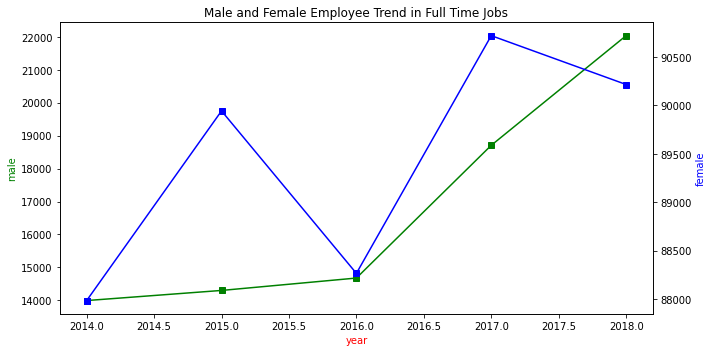

In [129]:
#Viewing both in same plot
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Male and Female Employee Trend in Full Time Jobs')
#Viewing both in same plot

# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.plot(time_ft.index, time_pt.male, color = 'g',marker="s")
ax2.plot(time_ft.index, time_pt.female, color = 'b',marker="s")
 
# giving labels to the axises
ax.set_xlabel('year', color = 'r')
ax.set_ylabel('male', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('female', color = 'b')
 
# defining display layout
#automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.tight_layout()
 
# show plot
plt.show()




# **Part Time Job Trend**

# Male Employee Trend in Part Time Jobs


Text(0.5, 1.0, 'Male Employee Trend in Part Time Jobs')

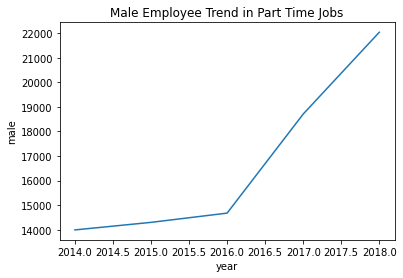

In [23]:
sns.lineplot(x= time_pt.index, y= time_pt.male, data=time_pt)
plt.title('Male Employee Trend in Part Time Jobs')

- Part Time jobs of male employees has been rising from 2014 with major increase between 2016-2018.
- Around 7,356 people are newly employed in part time jobs between 2016-2018

# Female Employee Trend in Part Time Jobs

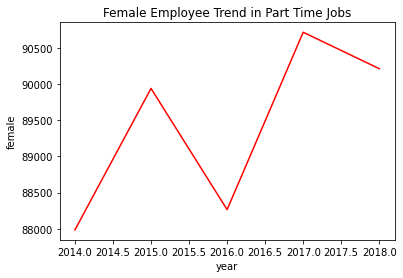

In [24]:
plt.title('Female Employee Trend in Part Time Jobs')
sns.lineplot(x= time_pt.index, y= time_pt.female, data=time_pt, color='r')




- There was a rise between 2014-2015 in female part time employees jobs
- There drop between 2015-2016 and it rose back between 2016-2017 with around  2,457 part time employees being newly employed
- There was a drop again between 2017-2018

Again, employment rate of women is more than men in part time jobs also

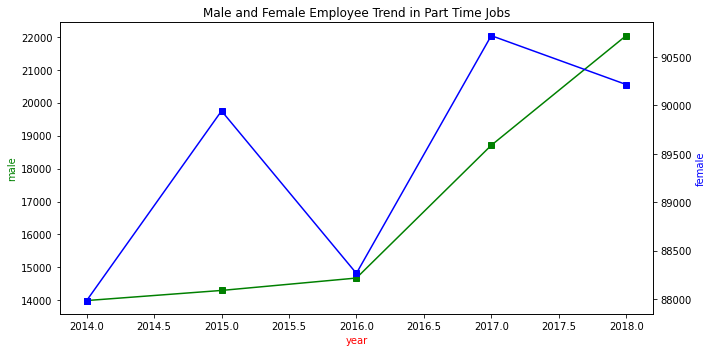

In [25]:
#Viewing both in same plot
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Male and Female Employee Trend in Part Time Jobs')

# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.plot(time_pt.index, time_pt.male, color = 'g', marker="s")
ax2.plot(time_pt.index, time_pt.female, color = 'b', marker="s")
 
# giving labels to the axises
ax.set_xlabel('year', color = 'r')
ax.set_ylabel('male', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('female', color = 'b')
 
# defining display layout
#automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.tight_layout()
 
# show plot
plt.show()



# The current representation of part time employees in the sector and in each Cluster

In [26]:
#current year here is 2018
pt_cluster = df[(df['pt/ft']=='part-time') & (df.year == 2018)] 
pt_cluster


,cluster,agency,year,pt/ft,gender,headcount
1656,education,education agency 1,2018,part-time,female,33
1657,education,education agency 2,2018,part-time,female,764
1658,education,education agency 3,2018,part-time,female,19110
1659,education,education agency 4,2018,part-time,female,19249
1660,family & community services,family & community services agency 1,2018,part-time,female,1370
...,...,...,...,...,...,...
1835,transport,transport agency 5,2018,part-time,male,1354
1836,transport,transport agency 6,2018,part-time,male,579
1837,treasury,treasury agency 1,2018,part-time,male,6
1838,treasury,treasury agency 2,2018,part-time,male,6


In [27]:
#current representation of part time employees in cluster
pt_cluster= pt_cluster.groupby('cluster').headcount.sum()
pt_cluster

cluster
education                         47939
family & community services        1512
finance, services & innovation     2058
health                            48500
industry                            813
justice                            5021
planning & environment             1553
premier & cabinet                   363
transport                          4343
treasury                            148
Name: headcount, dtype: int64

In [28]:
type(pt_cluster)

pandas.core.series.Series

In [29]:
#changing it to dataframe

pt_cluster= pd.DataFrame(pt_cluster)
pt_cluster=pt_cluster.sort_values(by='headcount',ascending=False)
pt_cluster

,headcount
cluster,
health,48500
education,47939
justice,5021
transport,4343
"finance, services & innovation",2058
planning & environment,1553
family & community services,1512
industry,813
premier & cabinet,363


Representing it in plot

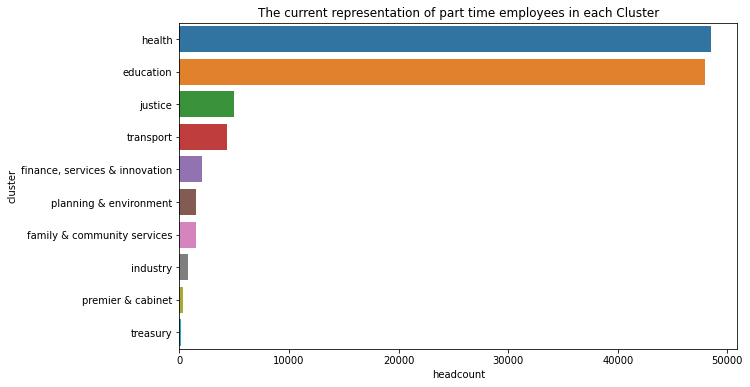

In [30]:
plt.figure(figsize=(10,6))
plt.title('The current representation of part time employees in each Cluster')
sns.barplot(x=pt_cluster.headcount , y= pt_cluster.index)

We have highest representation of part time employees in **Health and Education** cluster

# The current representation of male and female part time employees as a proportion of the respective male and the female workforce in the sector and in each cluster

In [31]:
#current year here is 2018 and we are getting records of male employees doing part time
m_pt_cluster = df[(df['pt/ft']=='part-time') & (df.year == 2018) & (df.gender=='male')] 
m_pt_cluster

,cluster,agency,year,pt/ft,gender,headcount
1748,education,education agency 1,2018,part-time,male,7
1749,education,education agency 2,2018,part-time,male,1687
1750,education,education agency 3,2018,part-time,male,2501
1751,education,education agency 4,2018,part-time,male,4588
1752,family & community services,family & community services agency 1,2018,part-time,male,103
...,...,...,...,...,...,...
1835,transport,transport agency 5,2018,part-time,male,1354
1836,transport,transport agency 6,2018,part-time,male,579
1837,treasury,treasury agency 1,2018,part-time,male,6
1838,treasury,treasury agency 2,2018,part-time,male,6


In [32]:
#similarly for female
f_pt_cluster = df[(df['pt/ft']=='part-time') & (df.year == 2018) & (df.gender=='female')] 
f_pt_cluster

,cluster,agency,year,pt/ft,gender,headcount
1656,education,education agency 1,2018,part-time,female,33
1657,education,education agency 2,2018,part-time,female,764
1658,education,education agency 3,2018,part-time,female,19110
1659,education,education agency 4,2018,part-time,female,19249
1660,family & community services,family & community services agency 1,2018,part-time,female,1370
...,...,...,...,...,...,...
1743,transport,transport agency 5,2018,part-time,female,216
1744,transport,transport agency 6,2018,part-time,female,220
1745,treasury,treasury agency 1,2018,part-time,female,75
1746,treasury,treasury agency 2,2018,part-time,female,6


In [33]:
#current representation of part time employees in cluster
m_pt_cluster= m_pt_cluster.groupby('cluster').headcount.sum()
f_pt_cluster= f_pt_cluster.groupby('cluster').headcount.sum()
m_pt_cluster

cluster
education                         8783
family & community services        113
finance, services & innovation     690
health                            7498
industry                           114
justice                           1447
planning & environment             302
premier & cabinet                   71
transport                         2998
treasury                            18
Name: headcount, dtype: int64

In [34]:
f_pt_cluster

cluster
education                         39156
family & community services        1399
finance, services & innovation     1368
health                            41002
industry                            699
justice                            3574
planning & environment             1251
premier & cabinet                   292
transport                          1345
treasury                            130
Name: headcount, dtype: int64

In [35]:
#changing it to dataframe

m_pt_cluster= pd.DataFrame(m_pt_cluster)
m_pt_cluster=m_pt_cluster.sort_values(by='headcount',ascending=False)

f_pt_cluster= pd.DataFrame(f_pt_cluster)
f_pt_cluster=f_pt_cluster.sort_values(by='headcount',ascending=False)

m_pt_cluster

,headcount
cluster,
education,8783
health,7498
transport,2998
justice,1447
"finance, services & innovation",690
planning & environment,302
industry,114
family & community services,113
premier & cabinet,71


In [36]:
f_pt_cluster

,headcount
cluster,
health,41002
education,39156
justice,3574
family & community services,1399
"finance, services & innovation",1368
transport,1345
planning & environment,1251
industry,699
premier & cabinet,292


Representing it plots

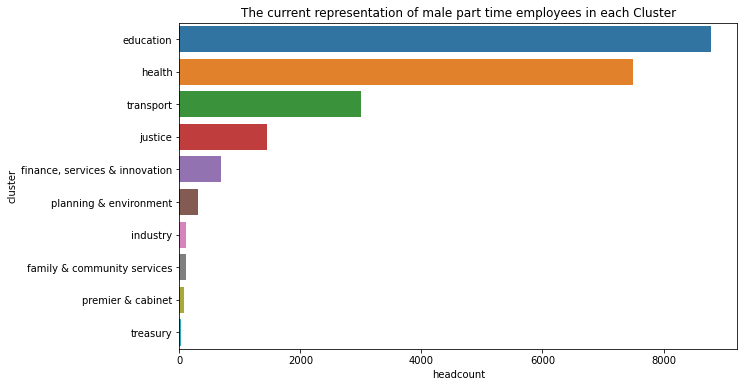

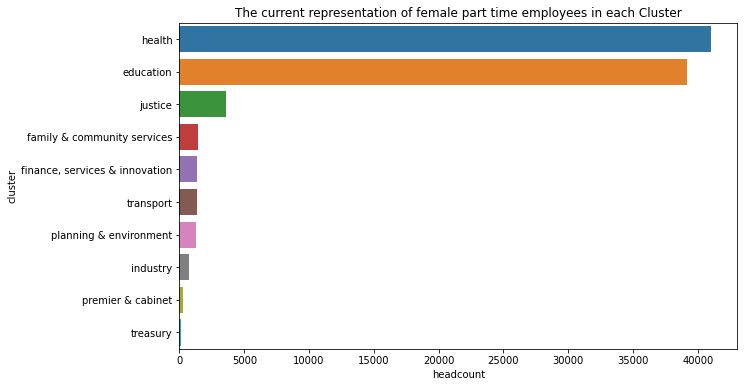

In [37]:
plt.figure(figsize=(10,6))
plt.title('The current representation of male part time employees in each Cluster')
sns.barplot(x=m_pt_cluster.headcount , y= m_pt_cluster.index)

plt.figure(figsize=(10,6))
plt.title('The current representation of female part time employees in each Cluster')
sns.barplot(x=f_pt_cluster.headcount , y= f_pt_cluster.index)

Now plotting it in pie chart to represent the percentage of male and female working in each sectors

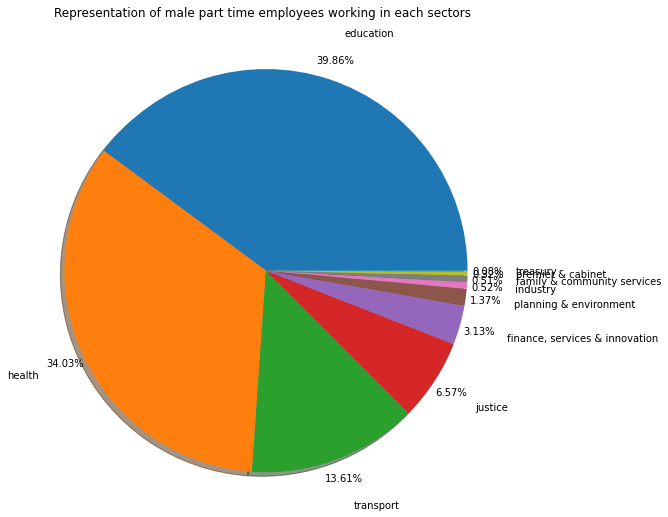

In [38]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.pie(m_pt_cluster.headcount,  labels=m_pt_cluster.index, autopct='%1.2f%%',
        shadow=True, startangle=0,pctdistance=1.1, labeldistance=1.24)
plt.title("Representation of male part time employees working in each sectors \n\n")
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



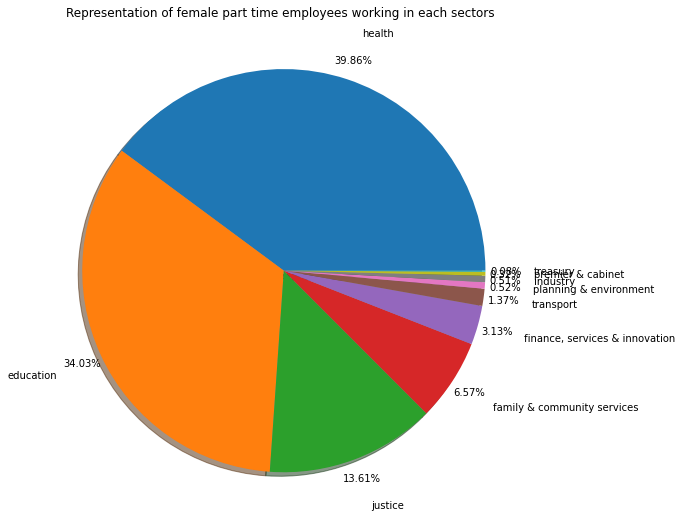

In [39]:
fig, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(m_pt_cluster.headcount,  labels=f_pt_cluster.index, autopct='%1.2f%%',
        shadow=True, startangle=0,pctdistance=1.1, labeldistance=1.24)
plt.title("Representation of female part time employees working in each sectors \n\n")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

# Change in these two above statistics over the last 4 years

## Statistics of male part time employees over last 4 years in each sectors

In [40]:
st_male_pt= df[(df.gender=='male') & (df['pt/ft']=='part-time') ]
st_male_pt

,cluster,agency,year,pt/ft,gender,headcount
276,education,education agency 1,2014,part-time,male,8
277,education,education agency 2,2014,part-time,male,1691
278,education,education agency 3,2014,part-time,male,1163
279,education,education agency 4,2014,part-time,male,2021
280,family & community services,family & community services agency 1,2014,part-time,male,1034
...,...,...,...,...,...,...
1835,transport,transport agency 5,2018,part-time,male,1354
1836,transport,transport agency 6,2018,part-time,male,579
1837,treasury,treasury agency 1,2018,part-time,male,6
1838,treasury,treasury agency 2,2018,part-time,male,6


In [41]:
st_male_pt=st_male_pt.groupby(['year','cluster']).headcount.sum()
st_male_pt

year  cluster                       
2014  education                         4883
      family & community services       1045
      finance, services & innovation     101
      health                            5318
      industry                           654
      justice                            418
      planning & environment             294
      premier & cabinet                   67
      transport                         1198
      treasury                            17
2015  education                         5159
      family & community services       1028
      finance, services & innovation     172
      health                            5632
      industry                           376
      justice                            418
      planning & environment             279
      premier & cabinet                   67
      transport                         1145
      treasury                            26
2016  education                         5582
      family & com

In [42]:
st_male_pt= pd.DataFrame(st_male_pt)
st_male_pt=st_male_pt.reset_index()
st_male_pt

,year,cluster,headcount
0,2014,education,4883
1,2014,family & community services,1045
2,2014,"finance, services & innovation",101
3,2014,health,5318
4,2014,industry,654
5,2014,justice,418
6,2014,planning & environment,294
7,2014,premier & cabinet,67
8,2014,transport,1198
9,2014,treasury,17


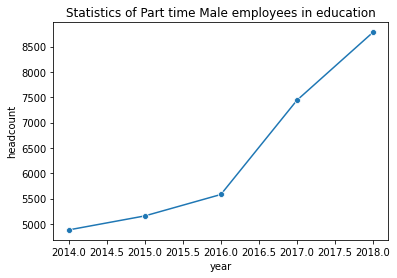

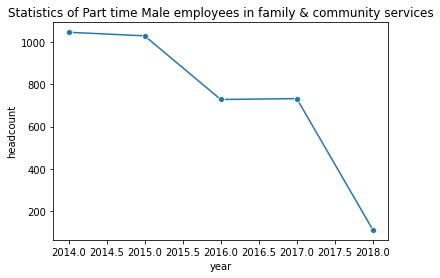

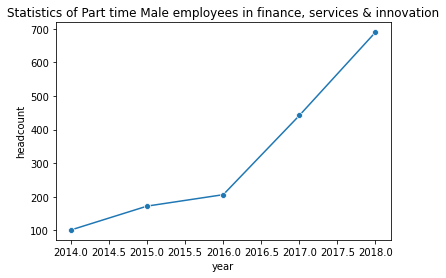

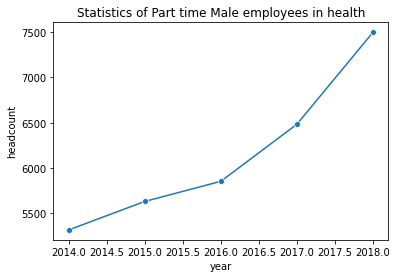

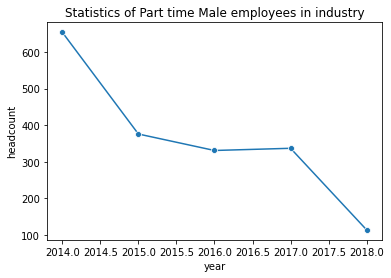

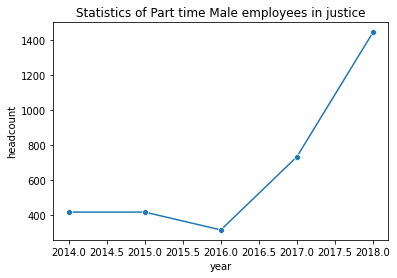

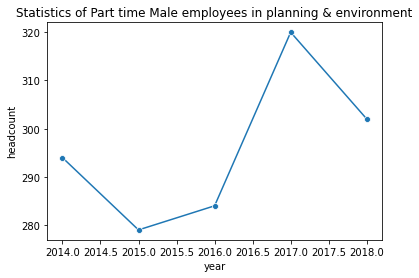

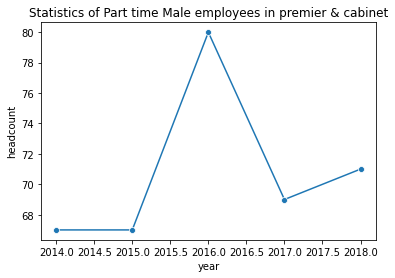

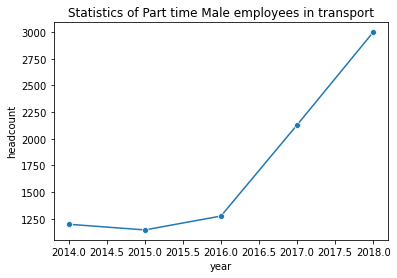

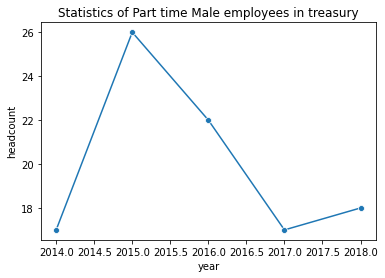

In [43]:
sectors=['education', 'family & community services','finance, services & innovation', 'health', 'industry', 'justice','planning & environment', 'premier & cabinet', 'transport',
       'treasury']

for i in sectors:
  sector_i = st_male_pt[st_male_pt.cluster==i]
  
  plt.title('Statistics of Part time Male employees in '+ i)
  sns.lineplot(x=sector_i.year,y=sector_i.headcount,marker='o')
  plt.show()

## Statistics of female part time employees over last 4 years in each sectors

In [44]:
st_female_pt= df[(df.gender=='female') & (df['pt/ft']=='part-time') ]
st_female_pt

,cluster,agency,year,pt/ft,gender,headcount
184,education,education agency 1,2014,part-time,female,48
185,education,education agency 2,2014,part-time,female,764
186,education,education agency 3,2014,part-time,female,18410
187,education,education agency 4,2014,part-time,female,16327
188,family & community services,family & community services agency 1,2014,part-time,female,5794
...,...,...,...,...,...,...
1743,transport,transport agency 5,2018,part-time,female,216
1744,transport,transport agency 6,2018,part-time,female,220
1745,treasury,treasury agency 1,2018,part-time,female,75
1746,treasury,treasury agency 2,2018,part-time,female,6


In [45]:
st_female_pt=st_female_pt.groupby(['year','cluster']).headcount.sum()
st_female_pt

year  cluster                       
2014  education                         35549
      family & community services        5819
      finance, services & innovation      639
      health                            36559
      industry                           2788
      justice                            3529
      planning & environment             1032
      premier & cabinet                   219
      transport                          1754
      treasury                             95
2015  education                         36801
      family & community services        5800
      finance, services & innovation      872
      health                            38055
      industry                           1697
      justice                            3590
      planning & environment             1075
      premier & cabinet                   230
      transport                          1548
      treasury                            275
2016  education                         389

In [46]:
st_female_pt= pd.DataFrame(st_female_pt)
st_female_pt=st_female_pt.reset_index()
st_female_pt

,year,cluster,headcount
0,2014,education,35549
1,2014,family & community services,5819
2,2014,"finance, services & innovation",639
3,2014,health,36559
4,2014,industry,2788
5,2014,justice,3529
6,2014,planning & environment,1032
7,2014,premier & cabinet,219
8,2014,transport,1754
9,2014,treasury,95


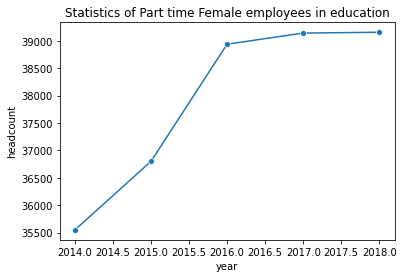

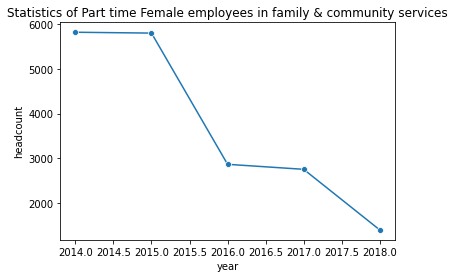

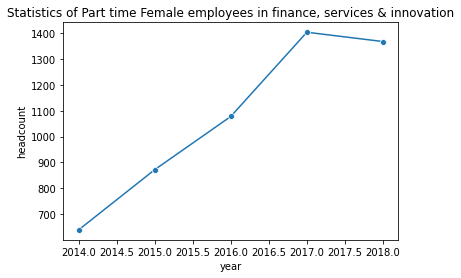

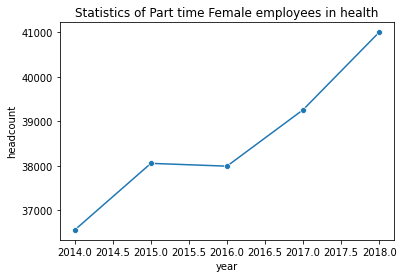

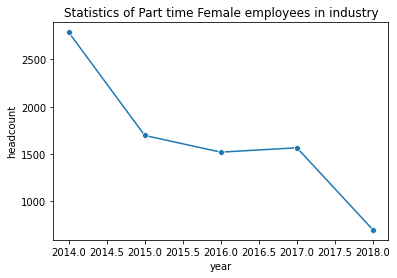

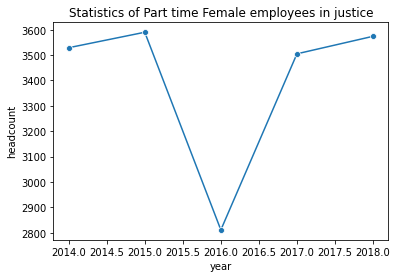

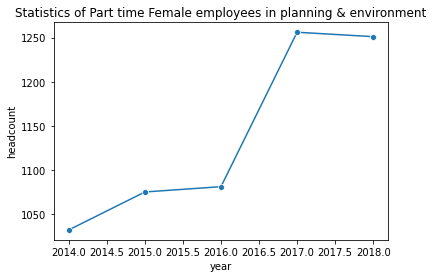

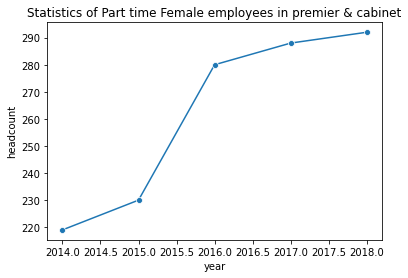

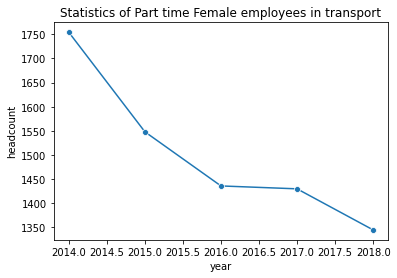

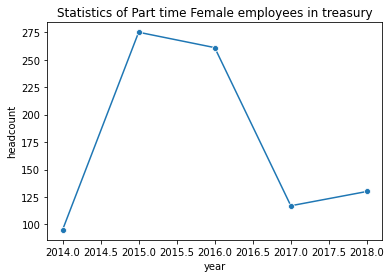

In [47]:
sectors=['education', 'family & community services','finance, services & innovation', 'health', 'industry', 'justice','planning & environment', 'premier & cabinet', 'transport',
       'treasury']

for i in sectors:
  sector_i = st_female_pt[st_female_pt.cluster==i]
  
  plt.title('Statistics of Part time Female employees in '+ i)
  sns.lineplot(x=sector_i.year,y=sector_i.headcount,marker='o')
  plt.show()

# Projection of what the representation will be by 2025 if the current trends continue

For predicting future trend, we'll use **ARIMA** model

**AutoRegressive Integrated Moving Average (ARIMA)** models are among the most widely used time series forecasting techniques

In [48]:
time_pt

,male,female
year,,
2014,13995,87983
2015,14302,89943
2016,14678,88264
2017,18706,90721
2018,22034,90216


In [85]:
time_ft

,male,female
year,,
2014,123614,156793
2015,118504,152038
2016,117976,154489
2017,114962,155408
2018,111377,155833


Using auto_arima to predict the future values

In [87]:
!pip install pmdarima
  
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(time_ft['male'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 0, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=7001.138, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=101.273, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=103.557, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=132.919, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=103.273, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=103.273, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=105.273, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=102.181, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.967 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    5
Model:                        SARIMAX   Log Likelihood                 -48.636
Date:                Thu, 15 Dec 2022   AIC                            101.273
Time:                        02:16:11   BIC                            100.492
Sample:                             0   HQIC                            99.176
                                  - 5                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.173e+05   1824.495     64.284      0.000    1.14e+05    1.21e+05
sigma2      1.646e+07   1.41e+07      1.169      0.242   -1.11e+07    4.41e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.46   Prob(JB):                         0.92
Heteroskedasticity (H):               0.97   Skew:                             0.11
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
from statsmodels.tsa.arima.model import ARIMA

model = model = ARIMA(time_ft['male'], 
                        order = (0, 0, 0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   male   No. Observations:                    5
Model:                          ARIMA   Log Likelihood                 -48.637
Date:                Thu, 15 Dec 2022   AIC                            101.273
Time:                        02:35:06   BIC                            100.492
Sample:                             0   HQIC                            99.177
                                  - 5                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.173e+05   1845.392     63.556      0.000    1.14e+05    1.21e+05
sigma2      1.665e+07   1.44e+07      1.156      0.248   -1.16e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.46   Prob(JB):                         0.92
Heteroskedasticity (H):               0.97   Skew:                             0.11
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

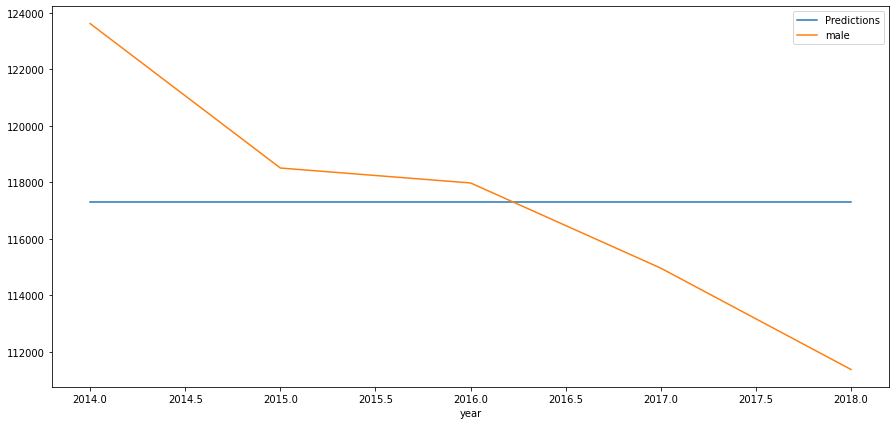

In [101]:
predictions = result.predict(start=2014, end=2018,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
time_ft['male'].plot(legend = True)

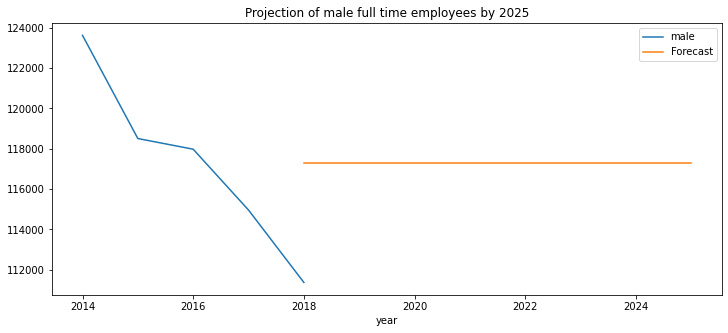

In [109]:

model = model = ARIMA(time_ft['male'], 
                        order = (0, 0, 0))
results = model.fit()

forecast = results.predict(start = 2018, end = 2025).rename('Forecast')

plt.title('Projection of male full time employees by 2025')
# Plot the forecast values
time_ft['male'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

Since our dataset is small with only 4 values, auto arima is unable to predict the trends. 

Hence, we were unable to predict the trends of the future and thus resulted in constant value. 

Similarly, we need to do for other records.

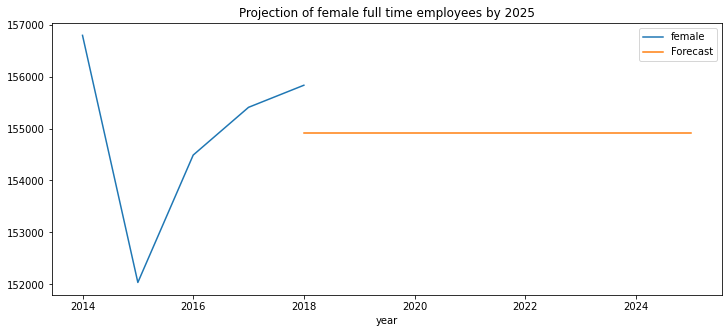

In [113]:

model = model = ARIMA(time_ft['female'], 
                        order = (0, 0, 0))
results = model.fit()

forecast = results.predict(start = 2018, end = 2025).rename('Forecast')

plt.title('Projection of female full time employees by 2025')
# Plot the forecast values
time_ft['female'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

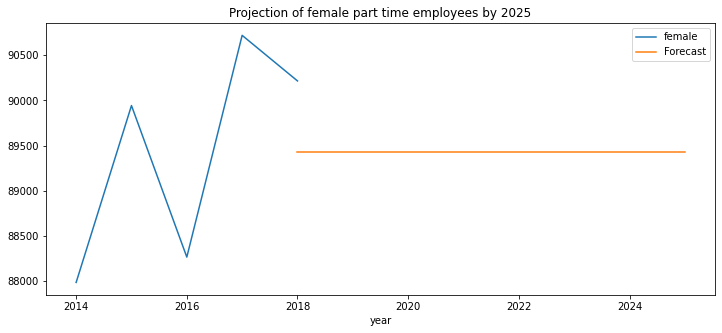

In [114]:

model = model = ARIMA(time_pt['female'], 
                        order = (0, 0, 0))
results = model.fit()

forecast = results.predict(start = 2018, end = 2025).rename('Forecast')

plt.title('Projection of female part time employees by 2025')
# Plot the forecast values
time_pt['female'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

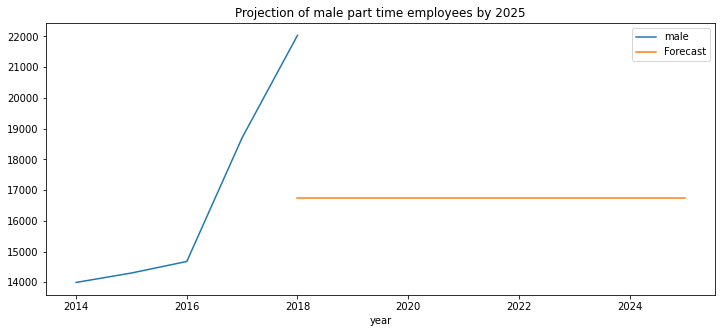

In [115]:

model = model = ARIMA(time_pt['male'], 
                        order = (0, 0, 0))
results = model.fit()

forecast = results.predict(start = 2018, end = 2025).rename('Forecast')

plt.title('Projection of male part time employees by 2025')
# Plot the forecast values
time_pt['male'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

## References

- https://github.com/chesterking123/NSW-Government-Virtual-Internship/blob/master/NSW%20GOVERNMENT%20CASE%20STUDY.ipynb

- https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/
- https://seaborn.pydata.org/api.html
